In [83]:
import pandas as pd


In [84]:

LongMethodSmell = '/content/drive/MyDrive/Colab files/Python_LongMethodSmell_Dataset.csv'


dataset = pd.read_csv(LongMethodSmell)


In [85]:
dataset.head()


,loc,lloc,scloc,comments,single_comments,multi_comments,blanks,h1,h2,n1,n2,vocabulary,length,calculated_length,volume,difficulty,effort,time,bugs,Experince Based
0,235,131,136,9,9,60,30,7,35,21,41,42,62,199.176390,334.323680,4.100000,1370.727089,76.151505,0.111441,1
1,162,64,67,20,20,49,26,9,28,19,38,37,57,163.135263,296.938842,6.107143,1813.447927,100.747107,0.098980,1
2,56,49,47,2,1,0,8,7,27,20,37,34,57,148.033447,289.985382,4.796296,1390.855813,77.269767,0.096662,1
3,49,23,45,3,3,0,1,1,3,2,4,4,6,4.754888,12.000000,0.666667,8.000000,0.444444,0.004000,1
4,166,128,119,23,23,0,24,15,76,58,109,91,167,533.445850,1086.801705,10.756579,11690.268340,649.459352,0.362267,1


In [86]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [87]:
dataset.keys()

Index(['loc', 'lloc', 'scloc', 'comments', 'single_comments', 'multi_comments',
       'blanks', 'h1', 'h2', 'n1', 'n2', 'vocabulary', 'length',
       'calculated_length', 'volume', 'difficulty', 'effort', 'time', 'bugs',
       'Experince Based '],
      dtype='object')

In [88]:
dataset['Experince Based ']


0      1
1      1
2      1
3      1
4      1
      ..
889    0
890    0
891    0
892    0
893    0
Name: Experince Based , Length: 894, dtype: int64

In [89]:
value = dataset.iat[1, 19]


In [90]:
X = dataset.iloc[:, 0:19]

In [91]:
#X = dataset[dataset.columns[19]]

In [92]:
y = dataset.iloc[:,19]

In [93]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)


In [94]:
X_train.shape

(715, 19)

In [95]:
X_test.shape

(179, 19)

In [96]:
y_train.shape

(715,)

In [97]:
y_test.shape

(179,)

In [98]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()



In [99]:
clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [100]:
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [101]:
y_pred = clf.predict(X_test)

In [102]:
from sklearn.metrics import confusion_matrix

In [103]:
print(confusion_matrix(y_test, y_pred))

[[137   7]
 [  5  30]]


In [104]:
from sklearn.metrics import classification_report

In [105]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.95      0.96       144
           1       0.81      0.86      0.83        35

    accuracy                           0.93       179
   macro avg       0.89      0.90      0.90       179
weighted avg       0.93      0.93      0.93       179



In [106]:
clf.feature_importances_

array([0.00993944, 0.0178727 , 0.83631413, 0.0038385 , 0.0069739 ,
       0.00379778, 0.01854283, 0.00607644, 0.        , 0.        ,
       0.03436208, 0.00632963, 0.        , 0.01031833, 0.01012741,
       0.03550683, 0.        , 0.        , 0.        ])

In [107]:
features = pd.DataFrame(clf.feature_importances_, index = X.columns)

In [108]:
features.head(19)

,0
loc,0.009939
lloc,0.017873
scloc,0.836314
comments,0.003838
single_comments,0.006974
multi_comments,0.003798
blanks,0.018543
h1,0.006076
h2,0.000000
n1,0.000000


In [109]:
clf2 = DecisionTreeClassifier(criterion='entropy', ccp_alpha=0.04)

In [110]:
clf2.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.04, criterion='entropy')

In [111]:
y_pred2 = clf2.predict(X_test)

In [112]:
print(confusion_matrix(y_test, y_pred2))

[[137   7]
 [  2  33]]


In [113]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97       144
           1       0.82      0.94      0.88        35

    accuracy                           0.95       179
   macro avg       0.91      0.95      0.92       179
weighted avg       0.95      0.95      0.95       179



In [114]:
features2 = pd.DataFrame(clf2.feature_importances_, index = X.columns)

In [115]:
features2.head(19)

,0
loc,0.0
lloc,0.0
scloc,1.0
comments,0.0
single_comments,0.0
multi_comments,0.0
blanks,0.0
h1,0.0
h2,0.0
n1,0.0


In [116]:
predictions = clf.predict(X_test)
predictions

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0])

In [117]:
# show difference between tree that doesn't have stopping criteria and the one that does
clf.predict_proba(X_test)

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.

In [118]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.9329608938547486

In [119]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions, labels=[0,1])

array([[137,   7],
       [  5,  30]])

In [120]:
from sklearn.metrics import precision_score
precision_score(y_test, predictions)

0.8108108108108109

In [121]:
from sklearn.metrics import recall_score
recall_score(y_test, predictions)

0.8571428571428571

In [122]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions, target_names=['malignant', 'benign']))

              precision    recall  f1-score   support

   malignant       0.96      0.95      0.96       144
      benign       0.81      0.86      0.83        35

    accuracy                           0.93       179
   macro avg       0.89      0.90      0.90       179
weighted avg       0.93      0.93      0.93       179



In [123]:
feature_names = X.columns
feature_names

Index(['loc', 'lloc', 'scloc', 'comments', 'single_comments', 'multi_comments',
       'blanks', 'h1', 'h2', 'n1', 'n2', 'vocabulary', 'length',
       'calculated_length', 'volume', 'difficulty', 'effort', 'time', 'bugs'],
      dtype='object')

In [124]:
clf.feature_importances_

array([0.00993944, 0.0178727 , 0.83631413, 0.0038385 , 0.0069739 ,
       0.00379778, 0.01854283, 0.00607644, 0.        , 0.        ,
       0.03436208, 0.00632963, 0.        , 0.01031833, 0.01012741,
       0.03550683, 0.        , 0.        , 0.        ])

In [125]:
feature_importance = pd.DataFrame(clf.feature_importances_, index = feature_names).sort_values(0, ascending=False)
feature_importance

,0
scloc,0.836314
difficulty,0.035507
n2,0.034362
blanks,0.018543
lloc,0.017873
calculated_length,0.010318
volume,0.010127
loc,0.009939
single_comments,0.006974
vocabulary,0.006330


In [126]:
features = list(feature_importance[feature_importance[0]>0].index)
features

['scloc',
 'difficulty',
 'n2',
 'blanks',
 'lloc',
 'calculated_length',
 'volume',
 'loc',
 'single_comments',
 'vocabulary',
 'h1',
 'comments',
 'multi_comments']

<Axes: >

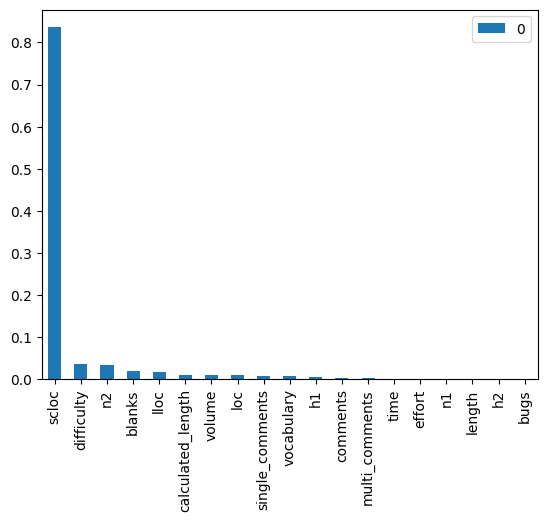

In [127]:
feature_importance.head(20).plot(kind='bar')

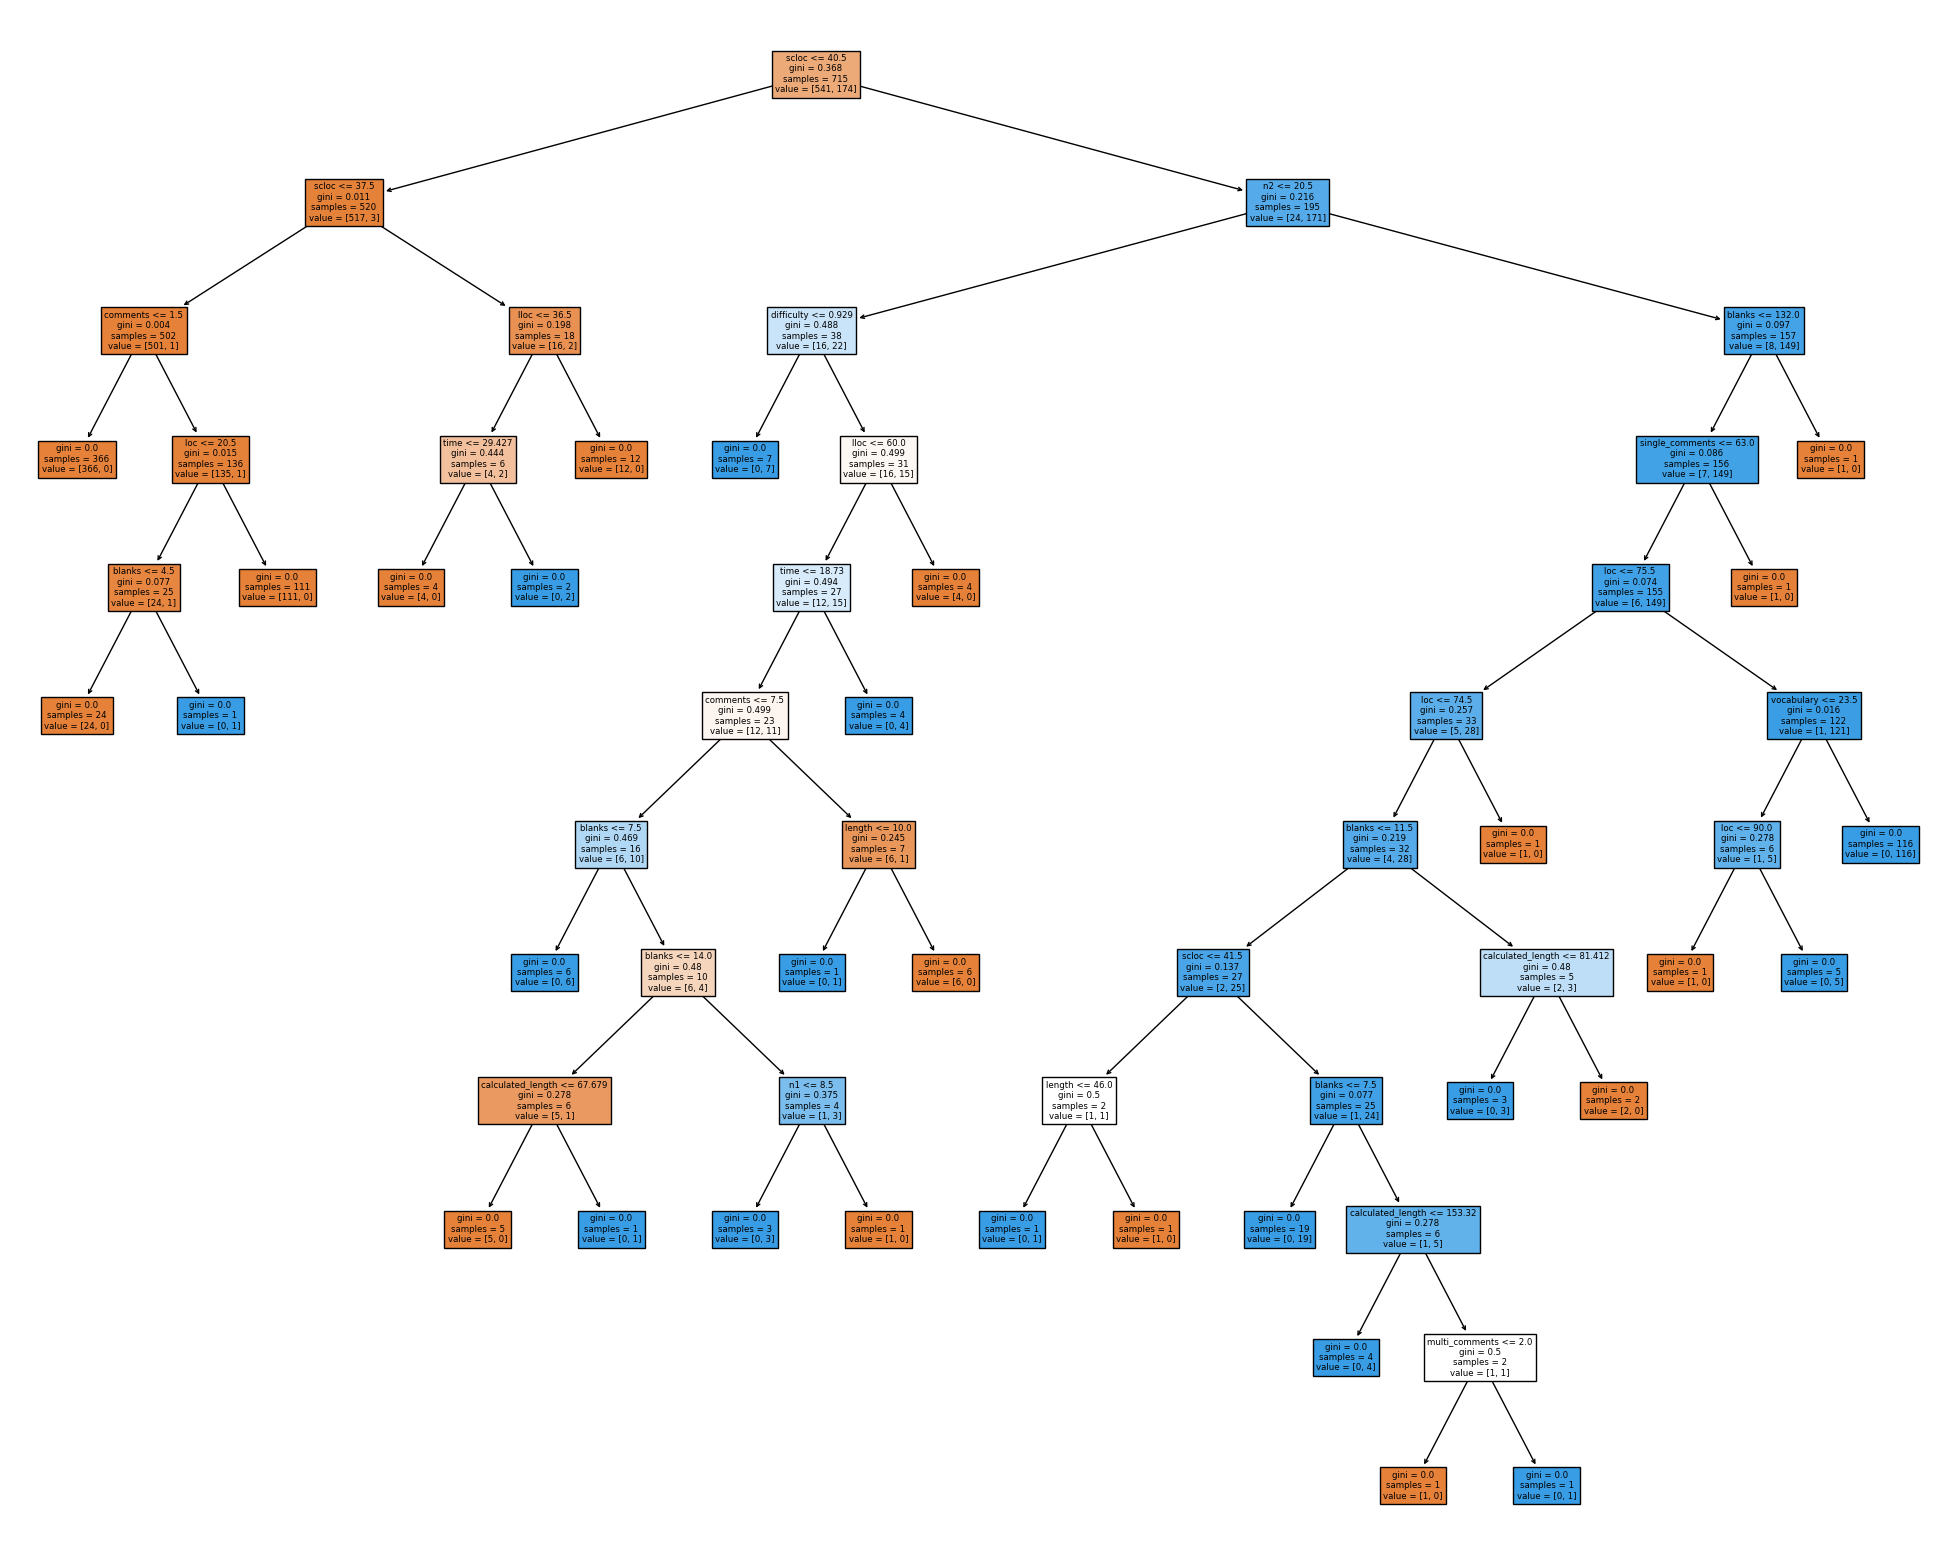

In [141]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Assuming 'model' is your trained DecisionTreeClassifier object
fig = plt.figure(figsize=(25, 20))
plt.title('Decision Tree Plot, LongMethod')

plot_tree(clf, filled=True, feature_names=dataset.columns)
plt.show()


In [129]:
# follow the first example on the tree to explain the decision_path function output
X_test.head()

,loc,lloc,scloc,comments,single_comments,multi_comments,blanks,h1,h2,n1,n2,vocabulary,length,calculated_length,volume,difficulty,effort,time,bugs
550,9,8,8,0,0,0,1,2,3,2,4,5,6,6.754888,13.931569,1.333333,18.575425,1.031968,0.004644
470,11,10,10,0,0,0,1,2,5,3,5,7,8,13.609640,22.458839,1.000000,22.458839,1.247713,0.007486
370,16,13,14,0,0,0,2,1,2,1,2,3,3,2.000000,4.754888,0.500000,2.377444,0.132080,0.001585
337,14,7,9,3,3,0,2,1,2,1,2,3,3,2.000000,4.754888,0.500000,2.377444,0.132080,0.001585
48,162,155,153,5,5,0,4,8,112,63,119,120,182,786.423751,1257.054088,4.250000,5342.479876,296.804438,0.419018


In [130]:
clf.decision_path(X_test)

<179x61 sparse matrix of type '<class 'numpy.int64'>'
	with 883 stored elements in Compressed Sparse Row format>

In [131]:
clf2.decision_path(X_test)

<179x3 sparse matrix of type '<class 'numpy.int64'>'
	with 358 stored elements in Compressed Sparse Row format>

In [132]:
sparse = clf.decision_path(X_test).toarray()[:101]

In [133]:
sparse2 = clf2.decision_path(X_test).toarray()[:101]

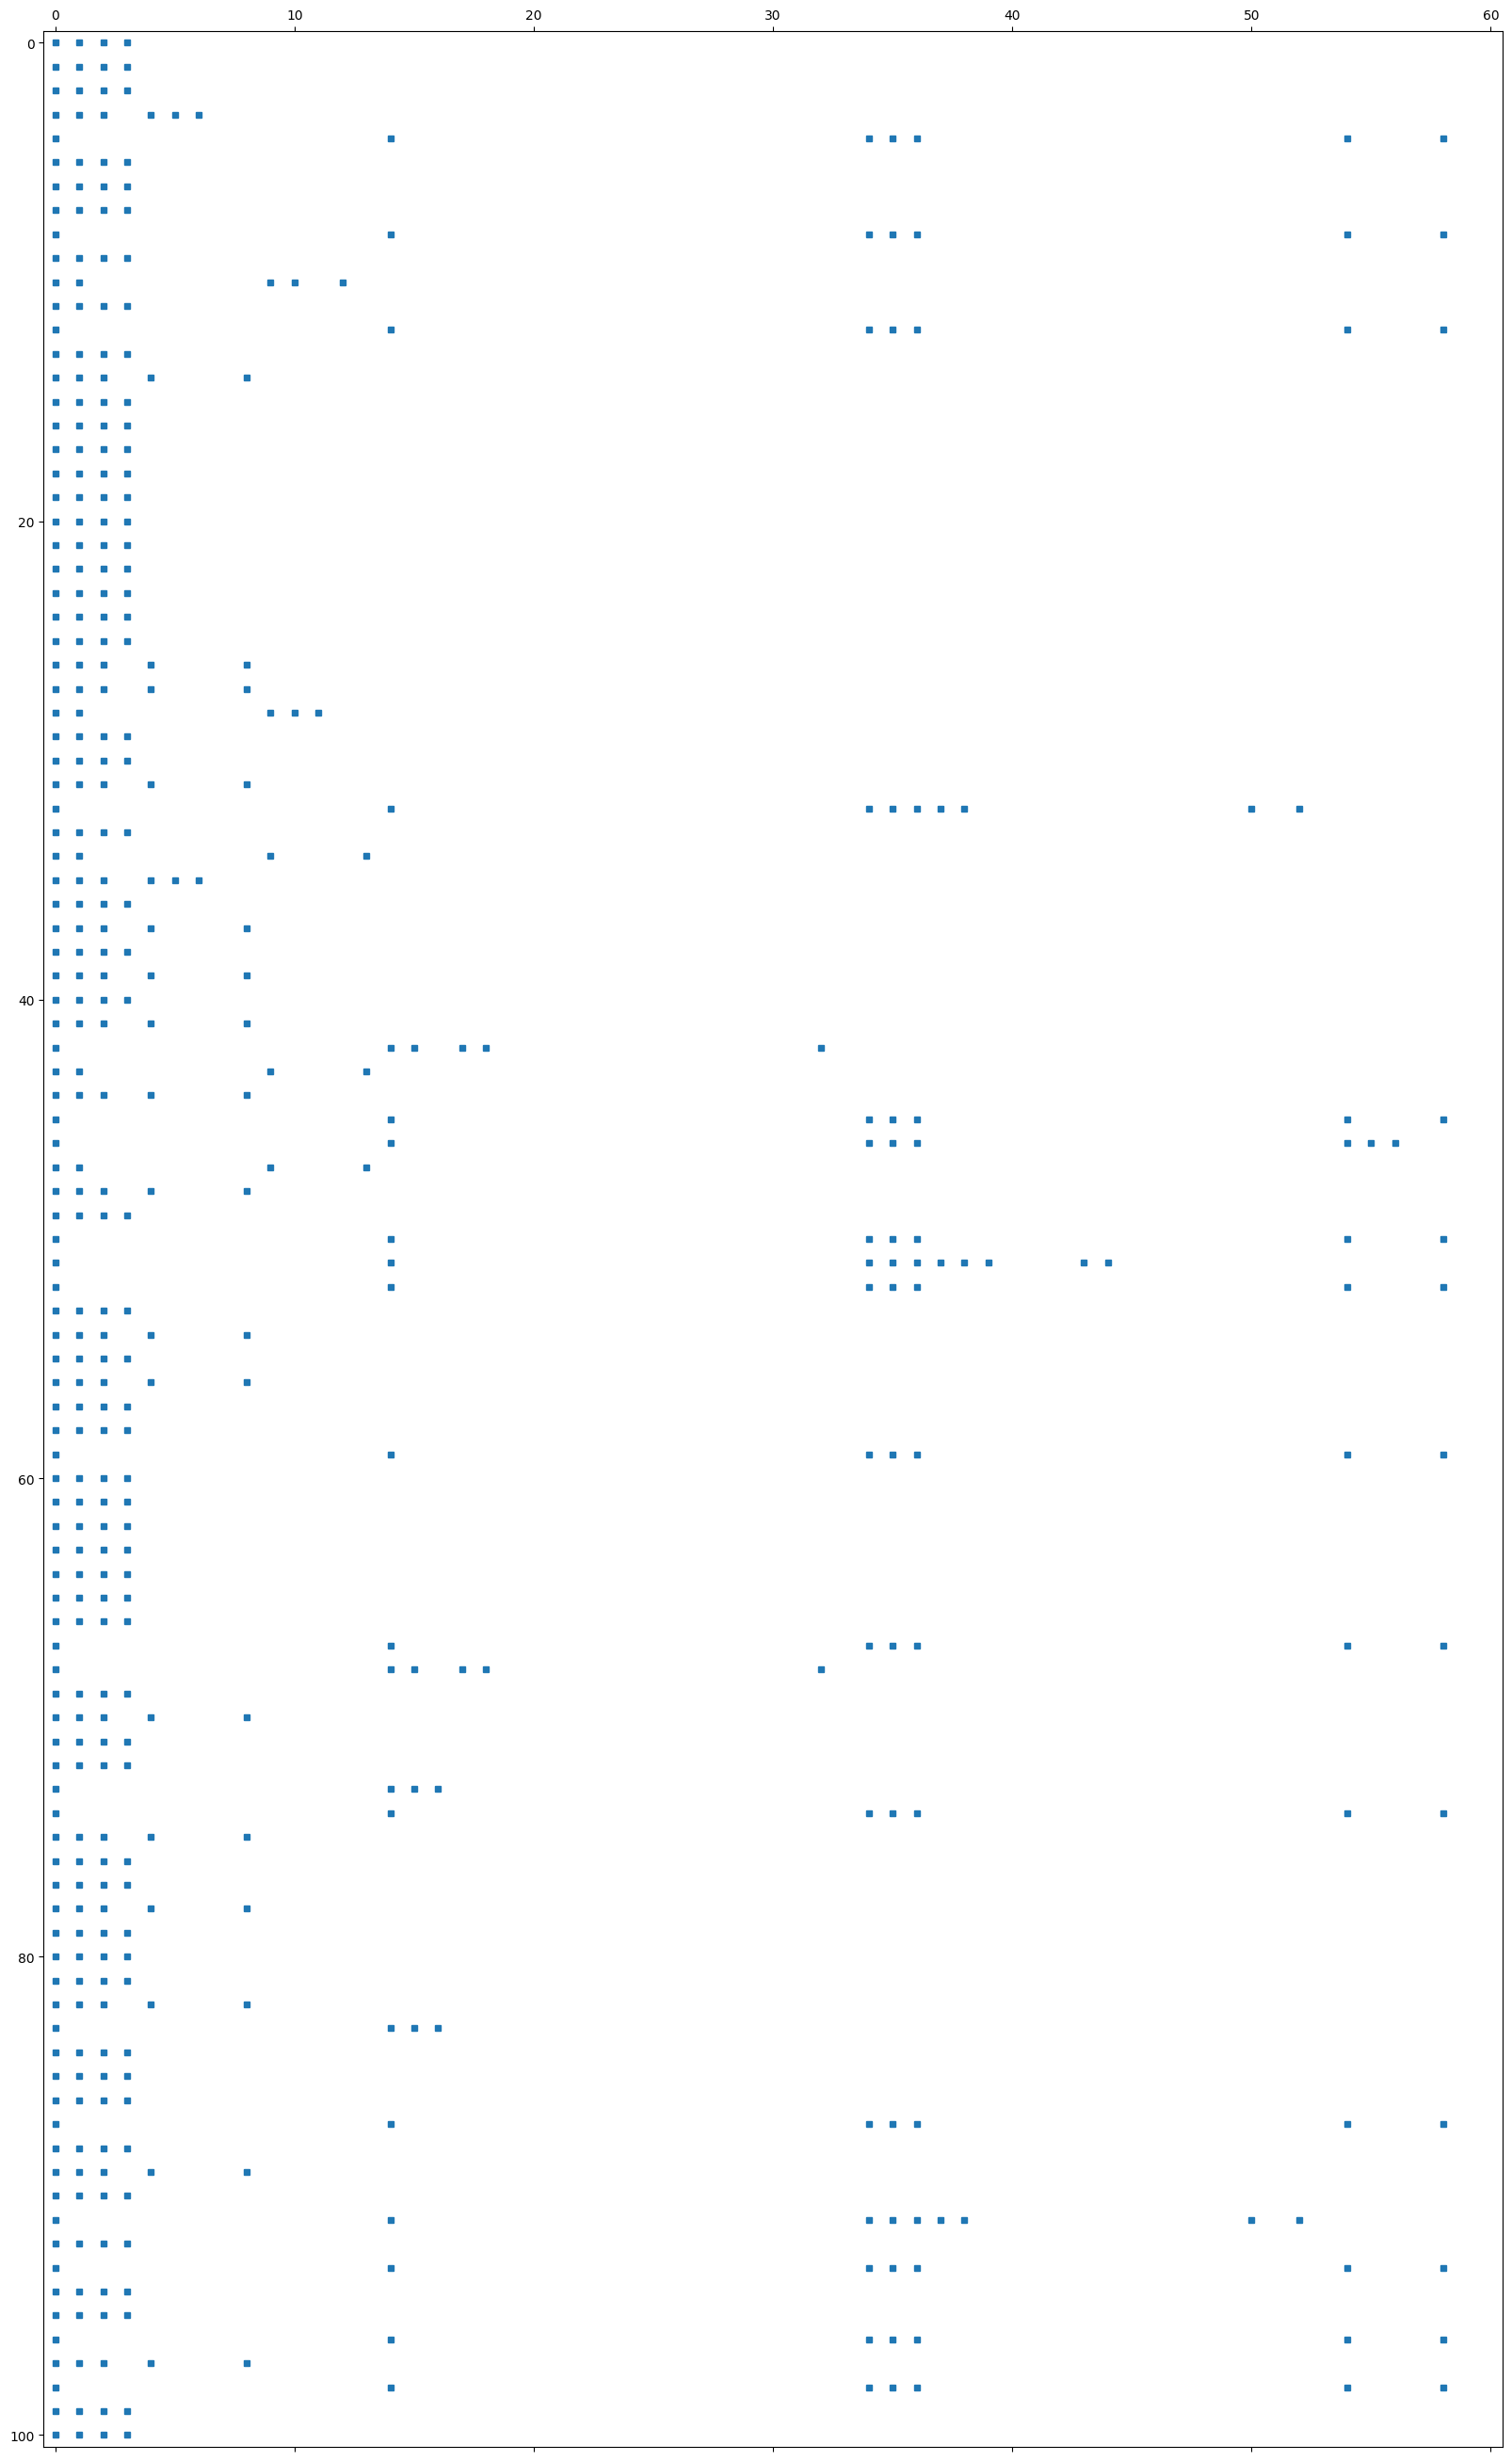

In [134]:
plt.figure(figsize=(20, 40))
plt.spy(sparse, markersize=5)

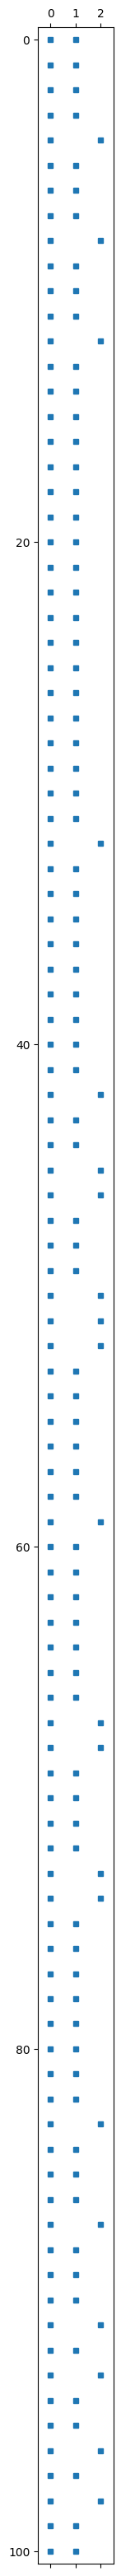

In [135]:
plt.figure(figsize=(20, 40))
plt.spy(sparse2, markersize=5)

In [136]:
from sklearn.metrics import accuracy_score

final_accuracy = accuracy_score(y_test, predictions)

print("Final Accuracy:", final_accuracy)


Final Accuracy: 0.9329608938547486


In [137]:

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9385474860335196
